In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt

from ccn import Constraint, ConstraintsGroup
from shapes import Rectangle
from experiment import Experiment

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


### Define the shapes

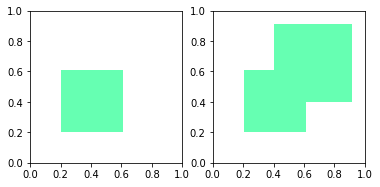

In [2]:
rect0 = Rectangle(0.2, 0.6, 0.2, 0.6)
rect1 = Rectangle(0.4, 0.9, 0.4, 0.9)
combined = rect0 | rect1
shapes = [rect0, combined]

fig, ax = plt.subplots(1, len(shapes))
for i, shape in enumerate(shapes):
  shape.plot(ax[i], full=True)
plt.show()

constraints1 = [ConstraintsGroup([Constraint('1 :- 0')])]
constraints2 = [ConstraintsGroup([Constraint('n0 :- n1')])]

### Define the neural network

In [3]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.linear = nn.Sequential(
            nn.Linear(2, 4),
            nn.Tanh(),
            nn.Linear(4, 2),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.linear(x)
        return x

model1 = NeuralNetwork()
model2 = NeuralNetwork()
print(model1)

NeuralNetwork(
  (linear): Sequential(
    (0): Linear(in_features=2, out_features=4, bias=True)
    (1): Tanh()
    (2): Linear(in_features=4, out_features=2, bias=True)
    (3): Sigmoid()
  )
)


### Train and test the model

env: CUDA_LAUNCH_BLOCKING=1
Epoch 1, Ratio 1.0
-----------------------
Created slicer for 1 modules (atoms {0, 1})
|===========================================================================|
|                  PyTorch CUDA memory summary, device ID 0                 |
|---------------------------------------------------------------------------|
|            CUDA OOMs: 0            |        cudaMalloc retries: 0         |
|===========================================================================|
|        Metric         | Cur Usage  | Peak Usage | Tot Alloc  | Tot Freed  |
|---------------------------------------------------------------------------|
| Allocated memory      |   25600 B  |   26624 B  |   55808 B  |   30208 B  |
|---------------------------------------------------------------------------|
| Active memory         |   25600 B  |   26624 B  |   55808 B  |   30208 B  |
|---------------------------------------------------------------------------|
| GPU reserved memory   |  

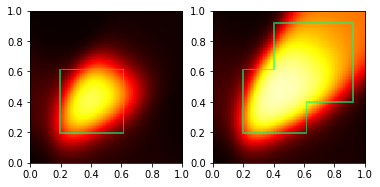

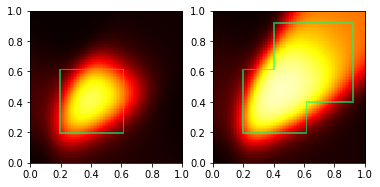

In [4]:
%env CUDA_LAUNCH_BLOCKING=1
experiment = Experiment('rectangles', model1, shapes, constraints1)
experiment.run(10, device, progressive=0)
#experiment.save(dir='./models/')

Epoch 1
-------------------------------
loss: 0.703867 [    0/10000]
loss: 0.547848 [ 6400/10000]
Test Error: 
 Accuracy: 84.2%, 64.0%
 Avg loss: 0.008565 

Epoch 2
-------------------------------
loss: 0.530661 [    0/10000]
loss: 0.496934 [ 6400/10000]
Test Error: 
 Accuracy: 84.2%, 65.5%
 Avg loss: 0.007873 

Epoch 3
-------------------------------
loss: 0.466750 [    0/10000]
loss: 0.482974 [ 6400/10000]
Test Error: 
 Accuracy: 84.2%, 66.6%
 Avg loss: 0.007789 

Epoch 4
-------------------------------
loss: 0.458864 [    0/10000]
loss: 0.479520 [ 6400/10000]
Test Error: 
 Accuracy: 84.2%, 66.8%
 Avg loss: 0.007762 

Epoch 5
-------------------------------
loss: 0.455886 [    0/10000]
loss: 0.478118 [ 6400/10000]
Test Error: 
 Accuracy: 84.2%, 66.7%
 Avg loss: 0.007744 

Epoch 6
-------------------------------
loss: 0.454910 [    0/10000]
loss: 0.476138 [ 6400/10000]
Test Error: 
 Accuracy: 84.2%, 67.1%
 Avg loss: 0.007717 

Epoch 7
-------------------------------
loss: 0.451870 [  

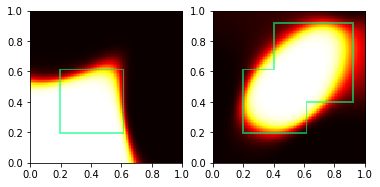

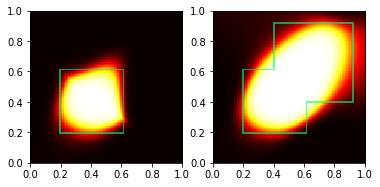

In [5]:
experiment = Experiment('rectangles-rev', model2, shapes, constraints2)
experiment.run(50, 'cpu')
#experiment.save(dir='./models/')